In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [15]:
#read in intersections data
intersections = gpd.read_file('data/osm/osm-intersections/osm-intersections-cleaned/osm-intersections-cleaned.shp')

In [16]:
intersections

,highway,osmid,geometry
0,residential,365394330,POINT (-122.34375 47.66505)
1,residential,39276972,POINT (-122.32027 47.69221)
2,residential,978885278,POINT (-122.38639 47.67951)
3,tertiary,460423542,POINT (-122.32675 47.61850)
4,tertiary,263732252,POINT (-122.27696 47.52612)
...,...,...,...
17606,residential,6345097,POINT (-122.27705 47.52261)
17607,residential,165476746,POINT (-122.30202 47.50604)
17608,unclassified,6437164,POINT (-122.33322 47.54440)
17609,secondary,8591373,POINT (-122.31755 47.68602)


In [18]:
#read in labels
labels = gpd.read_file('data/processed-labels/seattle_labels_all/seattle_labels_all.shp')

In [19]:
#select the curb ramps and non-curb ramps
curb = labels.loc[(labels['label_type']=='CurbRamp')]
no_curb = labels.loc[(labels['label_type']=='NoCurbRamp')]
#concatenate the two dataframes
all_curbs = pd.concat([curb, no_curb])
all_curbs

,label_id,label_type,severity,gsv_panora,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.750000,-15.625000,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618599,-122.332787,POINT (-122.33279 47.61860)
2,85059,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.187500,-24.500000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617512,-122.331833,POINT (-122.33183 47.61751)
3,85060,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,131.187500,-24.500000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617519,-122.331879,POINT (-122.33188 47.61752)
4,85062,CurbRamp,1.0,f_Mibt-6nJU7HTN7kx5ZGQ,1,257.187500,-35.000000,164.133438,0.335564,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.617638,-122.332047,POINT (-122.33205 47.61764)
5,85068,CurbRamp,1.0,qzzOihXh8f6fpAKK9ttmUQ,1,240.312500,-28.437500,220.271088,-0.452202,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.616974,-122.332909,POINT (-122.33291 47.61697)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195510,230814,NoCurbRamp,5.0,QsQ27yMqsAqroD5FmajRIA,2,281.256683,-14.370536,269.096100,8.288000,155af0a9-4149-4436-8aa3-7573e160036d,47.540749,-122.269951,POINT (-122.26995 47.54075)
195511,230816,NoCurbRamp,5.0,sZ2J86ZxmDo_LRWmIUy8mw,2,37.595982,-18.924107,269.825439,3.089200,155af0a9-4149-4436-8aa3-7573e160036d,47.540794,-122.269814,POINT (-122.26981 47.54079)
195517,230964,NoCurbRamp,4.0,isk8T0jXzG1NAJu_bOdaCg,3,293.687500,-6.578125,289.504578,-2.199040,a1dcc246-35ef-493f-ab99-80afa75169a6,47.692432,-122.340370,POINT (-122.34037 47.69243)
195518,230965,NoCurbRamp,3.0,isk8T0jXzG1NAJu_bOdaCg,3,335.828125,-16.562500,289.504578,-2.199040,a1dcc246-35ef-493f-ab99-80afa75169a6,47.692451,-122.340202,POINT (-122.34020 47.69245)


In [20]:
#change crs to 2285
intersections = intersections.to_crs(epsg=2285)
all_curbs = all_curbs.to_crs(epsg=2285)

In [21]:
#spatial join curb ramps to intersections
curb_to_intersection = all_curbs.sjoin_nearest(intersections, distance_col='distance')
curb_to_intersection

,label_id,label_type,severity,gsv_panora,zoom,heading,pitch,photograph,photogra_1,user_id,lat,lng,geometry,index_right,highway,osmid,distance
0,85055,CurbRamp,1.0,NjPAkwTxWsayAq3kCugvdA,1,107.750000,-15.625000,270.556610,0.907036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618599,-122.332787,POINT (1270633.170 229247.981),8231,residential,560096280,59.130699
16012,101038,CurbRamp,1.0,lq6_t34fb1KNDKlkTuiHnQ,2,24.008928,-12.232142,90.617798,1.109062,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.618610,-122.332863,POINT (1270614.439 229252.521),8231,residential,560096280,45.823490
16013,101041,CurbRamp,1.0,lq6_t34fb1KNDKlkTuiHnQ,1,127.678574,-35.000000,90.617798,1.109062,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.618462,-122.332970,POINT (1270587.043 229198.777),8231,residential,560096280,24.822625
16027,101039,CurbRamp,1.0,lq6_t34fb1KNDKlkTuiHnQ,2,24.008928,-12.232142,90.617798,1.109062,0e1ae564-6d72-4670-98e4-71369cc5ab26,47.618633,-122.332932,POINT (1270597.670 229261.198),8231,residential,560096280,42.606179
34329,90505,CurbRamp,1.0,Z_eTIaeGBVmlni66TM0GHQ,1,130.125000,0.000000,270.473511,0.796036,4f2a3a9a-a5d5-4d57-b2d1-6be61a6c2184,47.618481,-122.332962,POINT (1270589.060 229205.697),8231,residential,560096280,19.202894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193801,64004,NoCurbRamp,3.0,4zeGym5Ft6IjEMcsUYKhcg,1,32.875000,-25.607143,60.426399,2.248383,f13d2630-35fd-4a78-883d-d108be083425,47.535542,-122.350410,POINT (1265690.166 199042.613),10364,residential,1000645334,19.961273
193815,64317,NoCurbRamp,3.0,3W8G9xeJA7NCqcLrC4MVBA,1,266.375000,-6.500000,296.051605,3.638168,f13d2630-35fd-4a78-883d-d108be083425,47.534164,-122.352882,POINT (1265069.748 198552.438),16900,residential,1066269199,27.039617
194239,69989,NoCurbRamp,4.0,we1sdGBYN71Jr-21tdIVpw,1,181.000000,-10.000000,224.284485,3.302444,17c79e57-2062-4213-a933-13ca45b4522d,47.719627,-122.370331,POINT (1262111.601 266275.063),9960,residential,1064464819,31.575410
194982,66609,NoCurbRamp,3.0,tce7TZ5yyNJ4ABPpTwf35g,1,133.589279,-11.437500,357.425354,0.110832,86d26e9d-010f-4802-88ba-680ae0a8e20d,47.527378,-122.322815,POINT (1272447.906 195932.266),7891,tertiary,260373854,34.169599


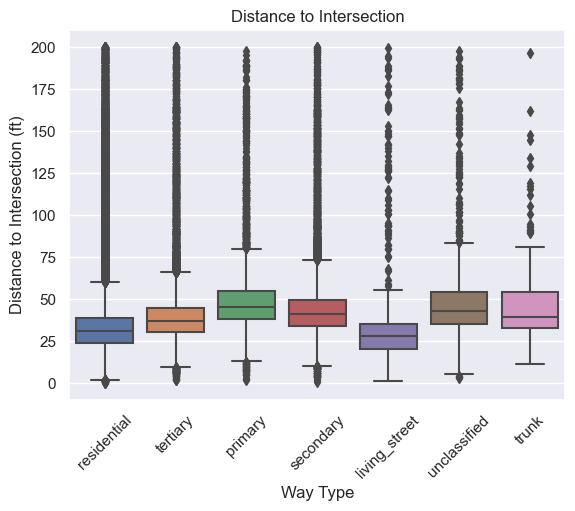

In [22]:
#select distance < 200 ft and do the same plot
distance_to_intersection = curb_to_intersection.loc[(curb_to_intersection['distance']<200)]
# sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="highway", y="distance", data=distance_to_intersection)
ax.set_title('Distance to Intersection')
ax.set_xlabel('Way Type')
ax.set_ylabel('Distance to Intersection (ft)')
#rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [9]:
#select only label_id, highwa, distance
curb_to_intersection = curb_to_intersection[['label_id','distance']]

In [10]:
#rename highway to way_type, and distance to distance_to_intersection
curb_to_intersection = curb_to_intersection.rename(columns={'distance':'distance_to_intersection'})
curb_to_intersection.head()

,label_id,distance_to_intersection
0,85055,59.130699
16012,101038,45.823490
16013,101041,24.822625
16027,101039,42.606179
34329,90505,19.202894


In [11]:
#merge labels and intersection_d
df = labels[['label_id']].merge(curb_to_intersection, on='label_id', how='left')
#fill in missing values with 0
df = df.fillna(0)
df

,label_id,distance_to_intersection
0,85055,59.130699
1,85057,0.000000
2,85059,37.121175
3,85060,33.832501
4,85062,46.324623
...,...,...
195538,231270,33.457578
195539,231285,0.000000
195540,231338,152.820404
195541,231339,225.060263


In [13]:
df.to_csv('data/features/distance_to_intersection.csv', index=False)